# Detecting Features in Images

## Convolutions

A convolution is simply a filter of weights that are used to multiply a pixel with its neighbors to get a new value for the pixel. For example, consider the ankle boot image from Fashion MNIST and the pixel values for it as shown below:

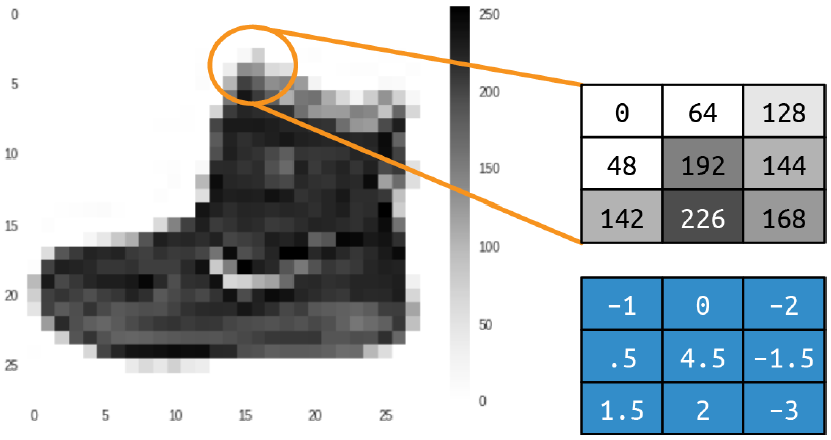

If we look at the pixel in the middle of the selection we can see that it has the value 192 (recall that Fashion MNIST uses monochrome images with pixel values from 0 to 255). The pixel above and to the left has the value 0, the one immediately above has the value 64, etc.

If we then define a filter in the same 3 × 3 grid, as shown below the original values, we can transform that pixel by calculating a new value for it. We do this by multiplying the current value of each pixel in the grid by the value in the same position in the filter grid, and summing up the total amount. This total will be the new value for the current pixel. We then repeat this for all pixels in the image.

So in this case, while the current value of the pixel in the center of the selection is 192, the new value after applying the filter will be:

```python
new_val = (-1 * 0) + (0 * 64) + (-2 * 128) +
(.5 * 48) + (4.5 * 192) + (-1.5 * 144) +
(1.5 * 142) + (2 * 226) + (-3 * 168)
```

This equals 577, which will be the new value for that pixel. Repeating this process across every pixel in the image will give us a filtered image.

Let’s consider the impact of applying a filter on a more complicated image: the ascent image that’s built into SciPy for easy testing. This is a 512 × 512 grayscale image that shows two people climbing a staircase.

Using a filter with negative values on the left, positive values on the right, and zeros in the middle will end up removing most of the information from the image except for vertical lines, as you can see below:

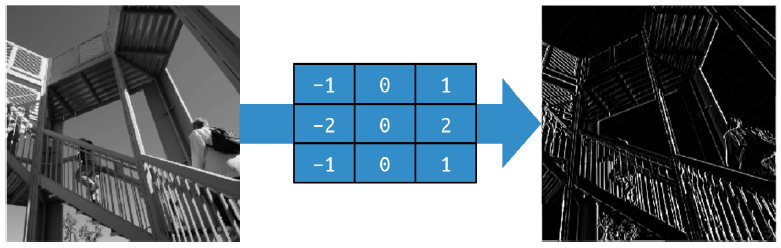

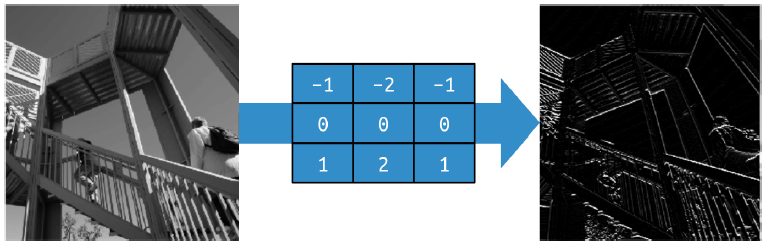

 ## Pooling

 Pooling is the process of eliminating pixels in your image while maintaining the semantics of the content within the image.

 For example below it shows the concept of ***max pooling***.

 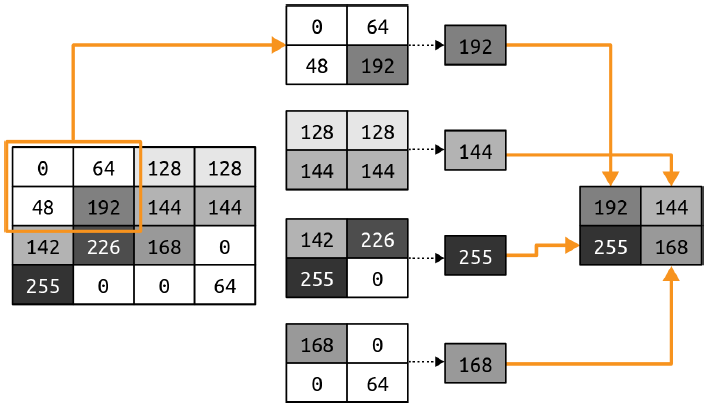

In this case, consider the box on the left to be the pixels in a monochrome image. We then group them into 2 × 2 arrays, so in this case the 16 pixels are grouped into four 2 × 2 arrays. These are called pools. We then select the maximum value in each of the groups, and reassemble those into a new image. Thus, the pixels on the left are reduced by 75% (from 16 to 4), with the
maximum value from each pool making up the new image.

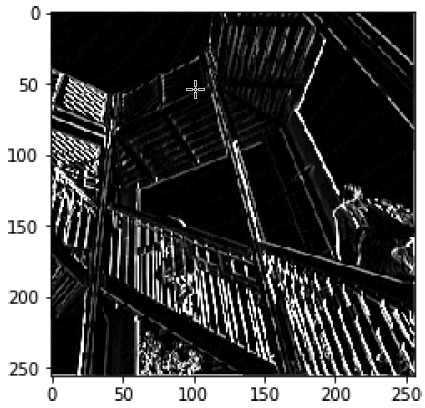

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

# Custom Keras Callback

For early stoppage of training.

In [2]:
class KerasCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.95:
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

# Implementing Convolutional Neural Networks

## Load and Split the Dataset

4422102/4422102 [==============================] - 0s 0us/step


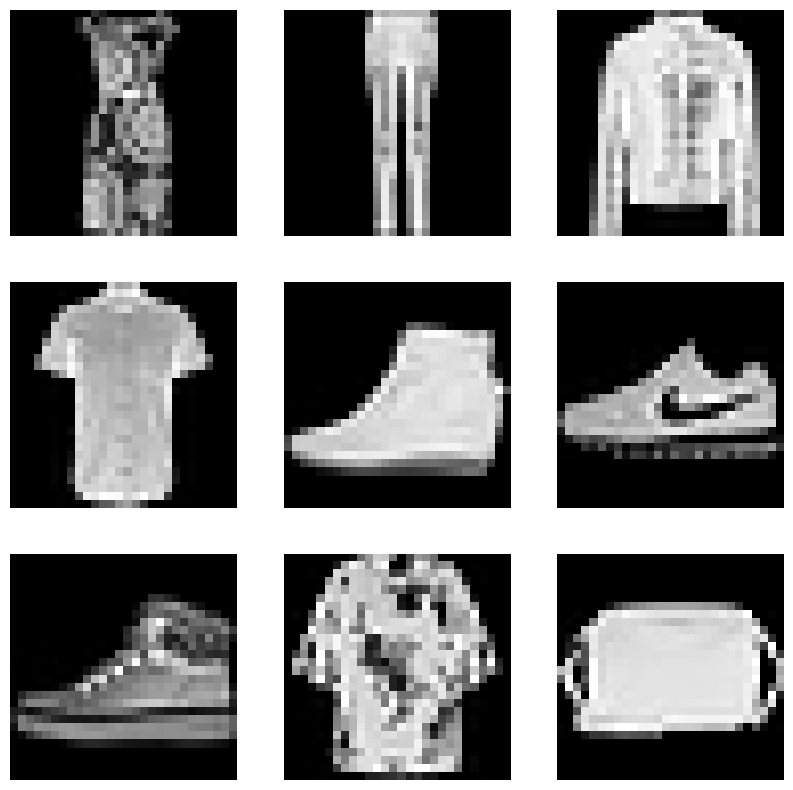

In [3]:
data = tf.keras.datasets.fashion_mnist

# load and split data
(training_images, training_labels), (test_images, test_labels) = data.load_data()

# show few images from training dataset
plt.figure(figsize=(10, 10))

# show a few images from the training data set
for i in range(9):
  image = random.choice(training_images)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image, cmap='gray')
  plt.axis("off")

## Reshape and Normalize the Dataset

In [8]:
# normalize
training_images=training_images.reshape(60000, 28, 28, 1)
training_images  = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

# print shape of images
print(training_images[0].shape)
# print(training_images[0])

(28, 28, 1)


## Design the Neural Network



**ReLU** - The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

Softmax - is an activation function that scales numbers/logits into probabilities.

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Exploring the Convolutional Neural Network

You can inspect your model using the model.summary command. When you run it on
the Fashion MNIST convolutional network we’ve been working on you’ll see something below:

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

Let’s first take a look at the Output Shape column to understand what is going on here. Our first layer will have 28 × 28 images, and apply 64 filters to them. But because our filter is 3 × 3, a 1-pixel border around the image will be lost, reducing our overall information to 26 × 26 pixels.


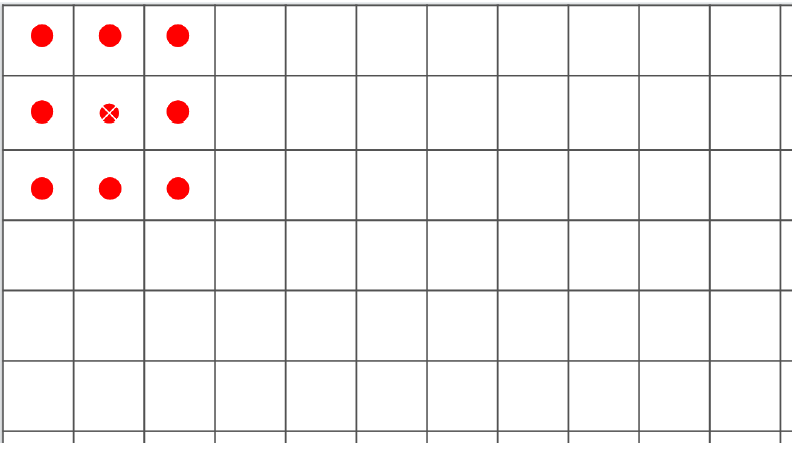

If we take each of the boxes as a pixel in the image, the first possible filter we can do starts at the second row and the second column. The same would happen on the right side and at the bottom of the diagram.

# Compile the Model

In [13]:
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

# Train the Model

In [14]:
# create the callback
callback = KerasCallback()

# model.fit(training_images, training_labels, epochs=60, callbacks=[callback])
history = model.fit(training_images, training_labels, epochs=60)

Epoch 1/60
1875/1875 [==============================] - 54s 28ms/step - loss: 0.8942 - accuracy: 0.6664
Epoch 2/60
1875/1875 [==============================] - 50s 26ms/step - loss: 0.5946 - accuracy: 0.7751
Epoch 3/60
1875/1875 [==============================] - 50s 27ms/step - loss: 0.5132 - accuracy: 0.8093
Epoch 4/60
1875/1875 [==============================] - 49s 26ms/step - loss: 0.4622 - accuracy: 0.8296
Epoch 5/60
1875/1875 [==============================] - 50s 27ms/step - loss: 0.4262 - accuracy: 0.8433
Epoch 6/60
1875/1875 [==============================] - 50s 26ms/step - loss: 0.4000 - accuracy: 0.8532
Epoch 7/60
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3788 - accuracy: 0.8612
Epoch 8/60
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3618 - accuracy: 0.8677
Epoch 9/60
1875/1875 [==============================] - 48s 26ms/step - loss: 0.3479 - accuracy: 0.8711
Epoch 10/60
1875/1875 [==============================] - 48s 25m

KeyboardInterrupt: ignored

# Evaluate the Model

In [ ]:
model.evaluate(test_images, test_labels)

 # Learning Curve

In [ ]:
print(history.history.keys())

training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

# plot accuracy training vs. validation
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# plot loss training vs. validation
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Inference / Prediction

In [ ]:
# print the image to classify
plt.imshow(test_images[1], cmap='gray')

classifications = model.predict(test_images)

prediction = np.argmax(classifications[1]) # get the index of highest value
print(prediction) # prediction
print(test_labels[1]) # true value label